# MARKET BASKET ANALYSIS

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar
import warnings
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
data= pd.read_csv("C:/Users/user/Desktop/masturah/BreadBasket_DMS.csv")

In [3]:
data.sample(7)

,Date,Time,Transaction,Item
16003,2017-02-28,14:02:12,7347,Coffee
8455,2016-12-31,10:00:05,4035,Bread
2794,2016-11-14,13:09:13,1315,Hearty & Seasonal
197,2016-10-31,09:19:41,89,Bread
19455,2017-03-26,13:37:28,8868,Coffee
14450,2017-02-17,14:45:07,6723,Sandwich
4310,2016-11-25,14:14:53,2052,Sandwich


In [4]:
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


(         Date      Time  Transaction           Item
 0  2016-10-30  09:58:11            1          Bread
 1  2016-10-30  10:05:34            2   Scandinavian
 2  2016-10-30  10:05:34            2   Scandinavian
 3  2016-10-30  10:07:57            3  Hot chocolate
 4  2016-10-30  10:07:57            3            Jam,
 None)

In [5]:
#transforming all items to lower case
data['Item']= data['Item'].str.lower()

In [6]:
#Inspecting the data
x=data['Item']=='none'
print(x.value_counts())

False    20507
True       786
Name: Item, dtype: int64


##### This implies that there are rows where transaction were made but item is none and number of such rows are 786. which will be drop

In [7]:
#Dropping all none value
data = data.drop(data[data.Item == 'none'].index)

In [8]:
data.shape

(20507, 4)

In [9]:
#Checking all unique items that are sold
len(data['Item'].unique())

94

##### There are 94 unique items sold in the Bakery or only 94 of items sold in the Bakery are present in this dataset

### Top 20 best selling items

In [10]:
data['Item'].value_counts().sort_values(ascending = False).head(20)

coffee           5471
bread            3325
tea              1435
cake             1025
pastry            856
sandwich          771
medialuna         616
hot chocolate     590
cookies           540
brownie           379
farm house        374
muffin            370
alfajores         369
juice             369
soup              342
scone             327
toast             318
scandinavian      277
truffles          193
coke              185
Name: Item, dtype: int64

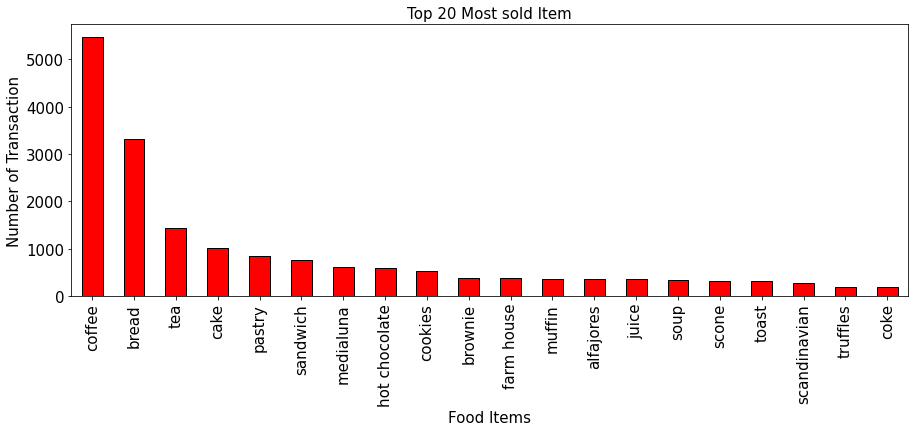

In [11]:
#Bar chart Displaying the top 20 product
fiq, ax=plt.subplots(figsize=(15,5))
data['Item'].value_counts().sort_values(ascending = False).head(20).plot.bar(width=0.5,color= "red",lw=1,ec='k',align='center')
plt.xlabel('Food Items', fontsize = 15)
plt.ylabel('Number of Transaction', fontsize = 15)
ax.tick_params(labelsize=15)
plt.title('Top 20 Most sold Item', fontsize = 15)
plt.ioff()

##### Using Datetime i created a new column called 'day_of_the_week' which can give us insights on which weekday has more transactions

In [12]:
data['datetime'] = pd.to_datetime(data['Date']+ ' '+ data['Time'])
data['Week']=data['datetime'].dt.isocalendar().week
data['Month']=data['datetime'].dt.month
data['Day']=data['datetime'].dt.day_name()
data['Hours']=data['datetime'].dt.hour

In [13]:
df =data[['Date','Transaction','Month','Week','Day','Hours']]

In [14]:
df

,Date,Transaction,Month,Week,Day,Hours
0,2016-10-30,1,10,43,Sunday,9
1,2016-10-30,2,10,43,Sunday,10
2,2016-10-30,2,10,43,Sunday,10
3,2016-10-30,3,10,43,Sunday,10
4,2016-10-30,3,10,43,Sunday,10
...,...,...,...,...,...,...
21288,2017-04-09,9682,4,14,Sunday,14
21289,2017-04-09,9682,4,14,Sunday,14
21290,2017-04-09,9683,4,14,Sunday,14
21291,2017-04-09,9683,4,14,Sunday,14


<AxesSubplot:xlabel='Day', ylabel='count'>

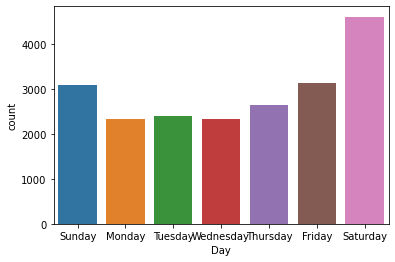

In [15]:
sns.countplot(x="Day", data = df)

##### From the above chart it is obvious that there are more sales on saturday than any other day. Also the weekend in general tends to be the Bakery sales days

<AxesSubplot:xlabel='Hours', ylabel='count'>

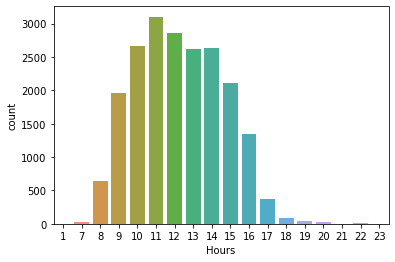

In [16]:
sns.countplot(x='Hours', data=df)

#### The chart above shows hours spent working in a day 

#### Running Apriori algorithm to get insight that if a customer buys one item which item he/she is likely to buy again

In [17]:
encode_df= data.groupby(["Transaction", 'Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')

In [18]:
encode_df.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###### The above code transform the data to make items as columns and each transaction as a row and count same items bought in one transaction but fill other columns of the with 0 to represent items which are not buy

In [19]:
def code(x):
    if x<= 0:
        return 0
    else:
        return 1
encode_df=encode_df.applymap(code)

In [20]:
frequent_itemsets = apriori(encode_df, min_support=0.01, use_colnames = True)
# items with support of at least 1%

In [21]:
rules= association_rules(frequent_itemsets, metric='lift', min_threshold =1)

In [22]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(coffee),(alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936
1,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
2,(pastry),(bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305
3,(bread),(pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306
4,(coffee),(brownie),0.478394,0.040042,0.019651,0.041078,1.025860,0.000495,1.001080
5,(brownie),(coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293
6,(coffee),(cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
7,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
8,(cake),(hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
9,(hot chocolate),(cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125


In [23]:
# RULES WITH CONFIDENCE OF 50% AND LIFT 0F 6
rules[(rules['confidence']>0.5) & (rules['lift']>1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
7,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
13,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
15,(hot chocolate),(coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553
17,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
19,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
23,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
25,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
27,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
29,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235


###### insight
It is obvious that coffee is the most purchased product in the bakery, and there is at least 50% chance that if the following product; alfajores,cake,hotchocolate,juice,pastry,medialuna,sandwich,scone, and spanish brunch are bought, coffee will be purchased after it. But there is 70% chance of buying coffee after purchasing toast.

# Recommendation
for someone that purchase a coffee

In [24]:
product = "coffee"
recommendation_list = []
for j,item in enumerate(rules['antecedents']):
    for i in list(item):
        if i == product:
            recommendation_list.append(list(rules.iloc[j]['consequents'])[0])

The below products are the product that can be recommend for someone that bought coffee

In [25]:
# the top 5 product with coffee
recommendation_list[:5]

['alfajores', 'brownie', 'cake', 'cookies', 'hot chocolate']

### The goal of the analysis is to see the rate at which one product dictates the other which has been obtained in line 22 and 23 respectively.
### Recommendation is also made for someone that purchase coffee.
### More analysis can still be done with this data but the goal is to obtained the dependency of the bakery products 